3.1.3 Function Approximation.

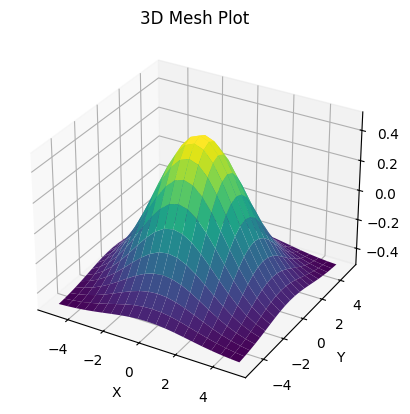

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the x, y arrays
x = np.arange(-5, 5.5, 0.5)
y = np.arange(-5, 5.5, 0.5)

# Create a mesh grid for x and y
xx, yy = np.meshgrid(x, y)

# Compute the z values
z = np.exp(-xx**2 * 0.1) * np.exp(-yy**2 * 0.1) - 0.5

# Plot the mesh
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh Plot')

plt.show()

1. Vary the number of nodes in the hidden layer from 1 to 25 (every few) and
try to observe any trends. What happens when you have very few (less
than 5) or very many (more than 20) hidden nodes? Can you explain your
observations? Try to make a model comparison - what error estimates and
how would you compare them to identify the ”best”4 model?

Mean Square Error for 3 Hidden Nodes with Data Size 400: 0.07688470218717755
Mean Square Error for 10 Hidden Nodes with Data Size 400: 0.02311129590896358
Mean Square Error for 20 Hidden Nodes with Data Size 400: 0.02909507189271538


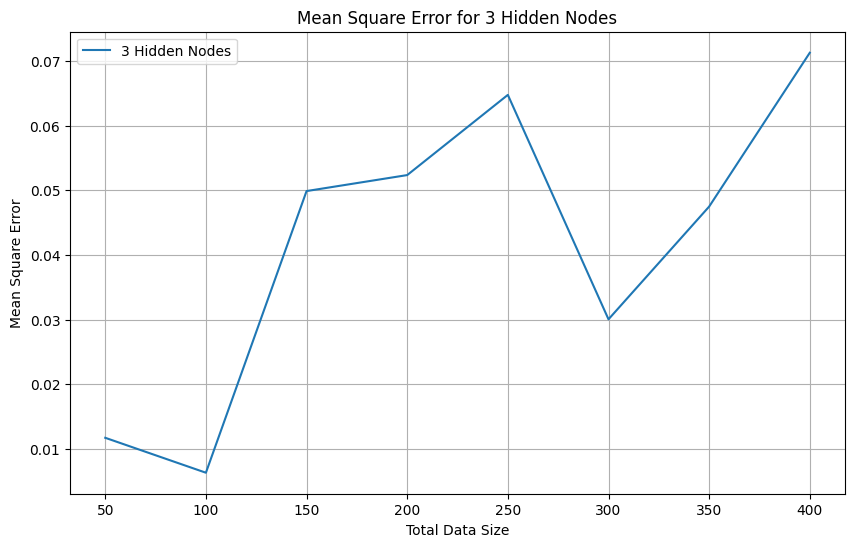

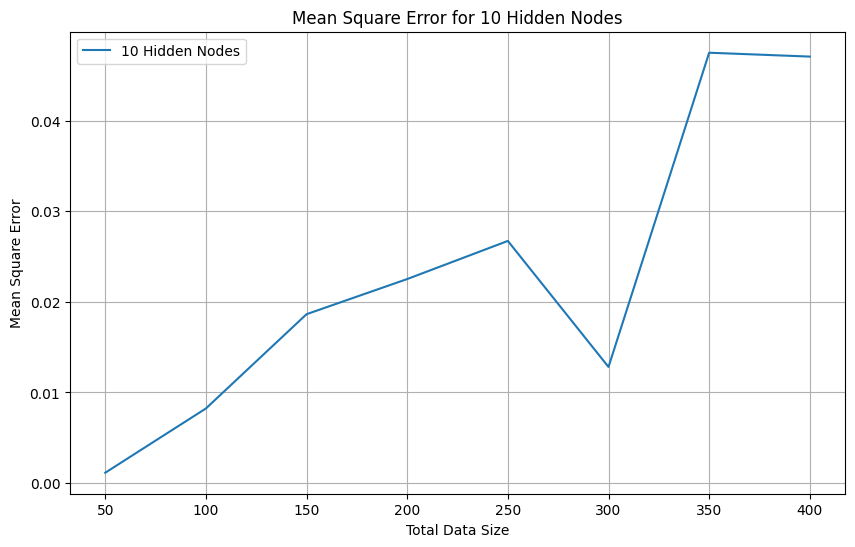

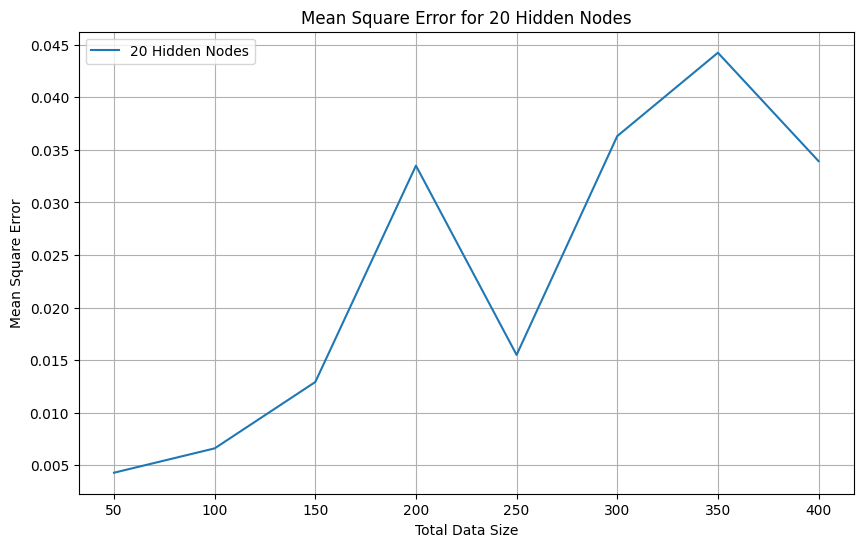

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Define the MLP model using PyTorch
class MLP(nn.Module):
    def __init__(self, input_size, num_hidden_nodes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, num_hidden_nodes)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(num_hidden_nodes, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def train_model(num_hidden_nodes, data, labels, data_size):
    model = MLP(data.shape[1], num_hidden_nodes)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    for _ in range(100):  # Train for 100 epochs (you can adjust this)
        optimizer.zero_grad()
        outputs = model(torch.Tensor(data[:data_size]))
        loss = criterion(outputs.squeeze(), torch.Tensor(labels[:data_size]))
        loss.backward()
        optimizer.step()

    # Calculate MSE for the complete dataset
    outputs = model(torch.Tensor(data))
    total_loss = criterion(outputs.squeeze(), torch.Tensor(labels)).item()

    # Calculate MSE for the specified data size
    predicted_labels = model(torch.Tensor(data[:data_size])).detach().numpy().flatten()
    mse = np.mean((predicted_labels - labels[:data_size])**2)

    return total_loss, mse

# Generate data
data, labels = generate_data()

# Define the range of hidden nodes to analyze
specific_hidden_nodes = [3, 10, 20]
data_size = 400  # Set the data size for which you want to calculate MSE

# Calculate and print the Mean Square Error for each hidden node for the specified data size
for num_hidden_nodes in specific_hidden_nodes:
    total_loss, mse = train_model(num_hidden_nodes, data, labels, data_size)
    #print(f'Total MSE for {num_hidden_nodes} Hidden Nodes: {total_loss}')
    print(f'Mean Square Error for {num_hidden_nodes} Hidden Nodes with Data Size {data_size}: {mse}')

# Plotting the Mean Square Error for different hidden nodes in separate plots
for num_hidden_nodes in specific_hidden_nodes:
    mse_values = []
    for data_size in range(50, len(data)+1, 50):
        _, mse = train_model(num_hidden_nodes, data, labels, data_size)
        mse_values.append(mse)

    plt.figure(figsize=(10, 6))
    plt.plot(range(50, len(data)+1, 50), mse_values, label=f'{num_hidden_nodes} Hidden Nodes')
    plt.title(f'Mean Square Error for {num_hidden_nodes} Hidden Nodes')
    plt.xlabel('Total Data Size')
    plt.ylabel('Mean Square Error')
    plt.legend()
    plt.grid(True)
    plt.show()

2. For the selected ”best” model, run experiments with varying number of
the training samples, e.g. from 80% down to 20% of all the dataset

Total Mean Square Error (MSE) for Complete Data: 0.6145638823509216
Final Mean Square Error (MSE) for Training Data: 0.01899494230747223
Final Mean Square Error (MSE) for Validation Data: 0.06404216587543488


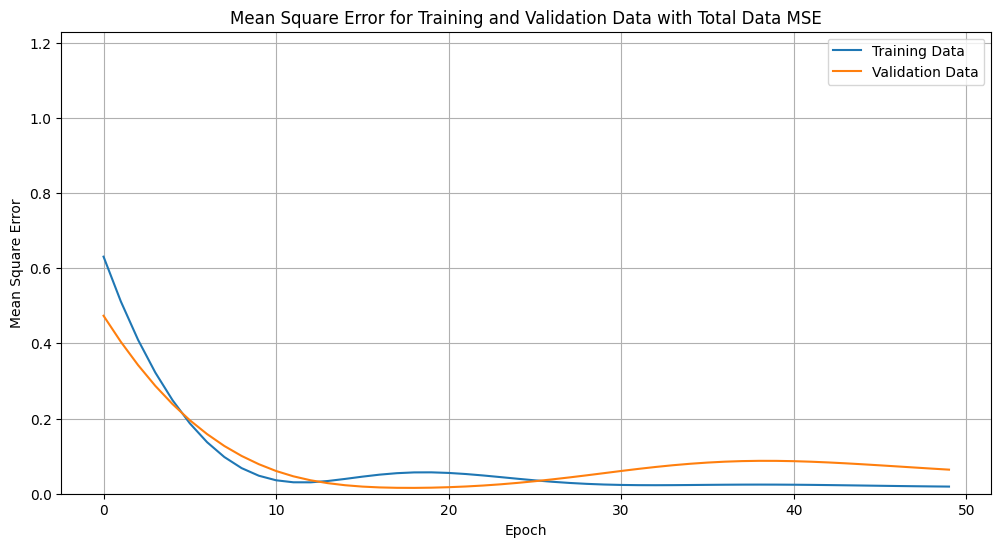

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the MLP model using PyTorch
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def generate_data():
    x = np.arange(-5, 5, 0.5)
    y = np.arange(-5, 5, 0.5)
    xx, yy = np.meshgrid(x, y)
    z = np.exp(-xx**2 * 0.1) * np.exp(-yy**2 * 0.1) - 0.5
    data = np.column_stack((xx.ravel(), yy.ravel()))  # Reshape xx and yy into a single matrix
    labels = z.ravel()  # Flatten z to a 1D array
    return data, labels

def calculate_mse(data, labels, model):
    outputs = model(torch.Tensor(data))
    loss = nn.MSELoss()(outputs.flatten(), torch.Tensor(labels))
    return loss.item()

def train_with_data_size(data, labels, condition):
    model = MLP(data.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    total_loss = calculate_mse(data, labels, model)  # Calculate MSE for the complete dataset
    
    data_size = len(data)
    train_size = int(condition * data_size)
    
    train_data, train_labels = data[:train_size], labels[:train_size]
    val_data, val_labels = data[train_size:], labels[train_size:]
    
    train_losses = []
    val_losses = []
    
    for epoch in range(50):
        optimizer.zero_grad()
        outputs = model(torch.Tensor(train_data))
        train_loss = nn.MSELoss()(outputs.flatten(), torch.Tensor(train_labels))
        train_loss.backward()
        optimizer.step()
        
        val_outputs = model(torch.Tensor(val_data))
        val_loss = nn.MSELoss()(val_outputs.flatten(), torch.Tensor(val_labels))
        
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
    
    return total_loss, train_losses, val_losses

# Generate data
data, labels = generate_data()

# Train the model with 80% training data and 20% validation data
condition = 0.8
total_loss, train_losses, val_losses = train_with_data_size(data, labels, condition)

# Print the MSE for the complete data and compare with validation loss
print(f'Total Mean Square Error (MSE) for Complete Data: {total_loss}')
print(f'Final Mean Square Error (MSE) for Training Data: {train_losses[-1]}')
print(f'Final Mean Square Error (MSE) for Validation Data: {val_losses[-1]}')

# Plot the Mean Square Error for Training and Validation Data with y-axis representing Total Data MSE
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Data')
plt.plot(val_losses, label='Validation Data')
plt.ylim(0, total_loss*2)  # Set the y-axis limit to show the total MSE value
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error for Training and Validation Data with Total Data MSE')
plt.legend()
plt.grid(True)
plt.show()

3. For the ”best” model, can you speed up the convergence without compro-
mising the generalisation performance?

Training with 80.0% of the data:
Final Training Loss: 0.022291308268904686
Final Validation Loss: 0.03729415684938431

Training with 60.0% of the data:
Final Training Loss: 0.020464355126023293
Final Validation Loss: 0.09295829385519028

Training with 40.0% of the data:
Final Training Loss: 0.01754153147339821
Final Validation Loss: 0.15326450765132904

Training with 20.0% of the data:
Final Training Loss: 0.0021900502033531666
Final Validation Loss: 0.0642884373664856



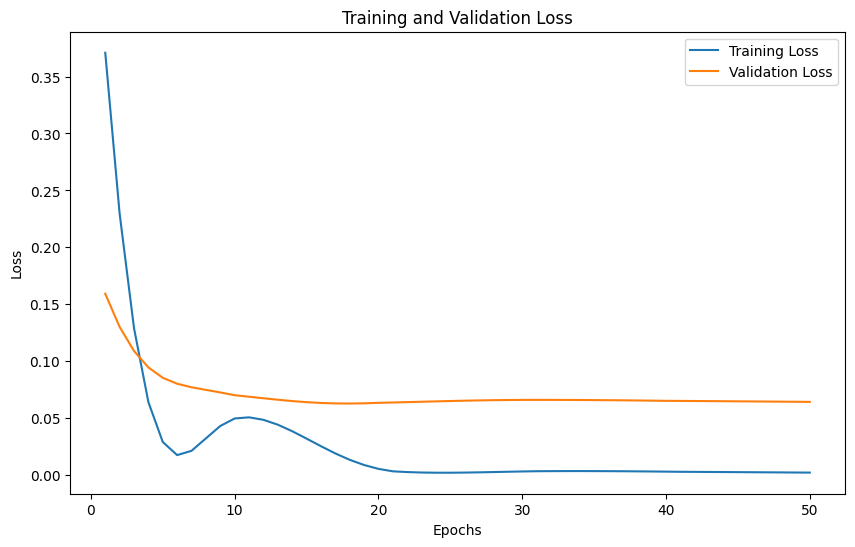

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate data
def generate_data():
    x = np.arange(-5, 5, 0.5)
    y = np.arange(-5, 5, 0.5)
    xx, yy = np.meshgrid(x, y)
    z = np.exp(-xx**2 * 0.1) * np.exp(-yy**2 * 0.1) - 0.5
    data = np.column_stack((xx.ravel(), yy.ravel()))  # Reshape xx and yy into a single matrix
    labels = z.ravel()  # Flatten z to a 1D array
    return data, labels

# Training function with learning rate scheduler
def train_with_data_size(data, labels, condition, initial_lr=0.001):
    data_size = len(data)
    train_size = int(condition * data_size)
    
    train_data, train_labels = data[:train_size], labels[:train_size]
    val_data, val_labels = data[train_size:], labels[train_size:]
    
    model = MLP(data.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=initial_lr)
    
    scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)  # Learning rate scheduler
    
    train_losses = []
    val_losses = []
    
    for epoch in range(50):
        optimizer.zero_grad()
        outputs = model(torch.Tensor(train_data))
        train_loss = criterion(outputs.flatten(), torch.Tensor(train_labels))
        train_loss.backward()
        optimizer.step()
        scheduler.step()  # Update learning rate
        
        val_outputs = model(torch.Tensor(val_data))
        val_loss = criterion(val_outputs.flatten(), torch.Tensor(val_labels))
        
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
    
    return train_losses, val_losses

# Generate data
data, labels = generate_data()

# Train the model with varying training data sizes
train_sizes = [0.8, 0.6, 0.4, 0.2]
learning_rate = 0.001

for size in train_sizes:
    train_losses, val_losses = train_with_data_size(data, labels, size, initial_lr=learning_rate)
    print(f"Training with {size*100}% of the data:")
    print("Final Training Loss:", train_losses[-1])
    print("Final Validation Loss:", val_losses[-1])
    print()

# Plot the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_losses, label='Training Loss')
plt.plot(range(1, 51), val_losses, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()